# SCIENTIFIC INVESTIGATION ON TITANIC'S CASE

## 01. IMPORTING DATA

In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid') # Plots are gonna have white grids.

## 02. LOADING THE DATASET

In [116]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
combined_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True) 

## 03. DATASET SUMMARY

In [117]:
print("=" * 50)
print("TITANIC DISASTER DATASET SUMMARY")
print("=" * 50)
print(f"Trainning Set:  {train_df.shape[0]} Passengers & {train_df.shape[1]} Features.")
print(f"Testing Set:    {test_df.shape[0]} Passengers & {test_df.shape[1]} Features.")
print(f"Combined Set:  {combined_df.shape[0]} Passengers & {combined_df.shape[1]} Features.")

print("\nFeatures:")
for i, feature in enumerate(combined_df.columns, start = 1):
    print(f"   {i:02d}. {feature}")
print("=" * 50)

TITANIC DISASTER DATASET SUMMARY
Trainning Set:  891 Passengers & 12 Features.
Testing Set:    418 Passengers & 11 Features.
Combined Set:  1309 Passengers & 12 Features.

Features:
   01. PassengerId
   02. Survived
   03. Pclass
   04. Name
   05. Sex
   06. Age
   07. SibSp
   08. Parch
   09. Ticket
   10. Fare
   11. Cabin
   12. Embarked


## 04. WHAT STORY DOES THE DATA TELL US?

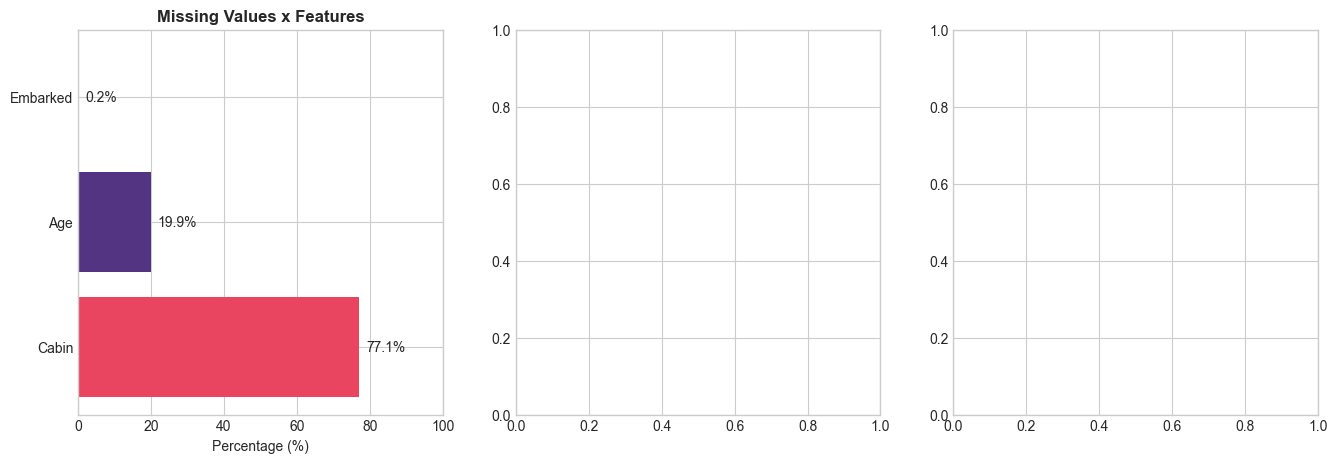

In [121]:
# Creating a 3-axes figure.
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. MISSING VALUES HEATMAP
ax1 = axes[0]
missing_data = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = ( missing_data / len(train_df) * 100 ).round(2)

missing_df = pd.DataFrame({
    "Missing": missing_data,
    "Percentage": missing_percentage                   
})
missing_df = missing_df[missing_df["Missing"] > 0]

colors = [
    "#e94560" if x > 50
    else
        "#533483" if x > 10
        else "#0f3460"
    for x in missing_df["Percentage"]
] # BLUE for 0 < x <= 10; PURPLE for 10 < x <= 50; and PINK for x >= 50.

bars = ax1.barh(missing_df.index, missing_df["Percentage"], color = colors)
ax1.set_title("Missing Values x Features", fontweight="bold")
ax1.set_xlabel("Percentage (%)")
ax1.bar_label(bars, fmt="%.1f%%", padding=5)
ax1.set_xlim(0, 100)

# 2. SURVIVAL DISTRIBUTION
ax2 = axes[1]
survival_counts = train_df['Survived'].value_counts()

# 3. AGE DISTRIBUTION
ax3 = axes[2]

In [124]:
survival_counts = train_df['Survived'].value_counts()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64